
# <h1 style="background-color:Pink;"> <font size="15"> <b> <font color='black'> <center> Happiness Report 
    

## INHALTSVERZEICHNIS

### <b> <a href='#chapter1'> I. Daten Import und Untersuchung </a>

    

### <b> <a href='#chapter2'> II. Daten  Visualisierung </a>


    
### <b> <a href='#chapter3'> III. Daten Transformierung und Bereinigung </a>
    
    
    
### <b> <a href='#chapter3'> IV. Modellierung - Vorhersage der Happiness Score  </a>

    

# I. Data Import und Untersuchung

- World Happiness Report

- Quell: Kaggle

In [1045]:
# # TO STORE AND PROCESS DATA IN DATAFRAME
import pandas as pd
import os

# FOR NUMERICAL ANALYTICS
import numpy as np

# BASIC VISUALIZATION PACKAGE
import matplotlib.pyplot as plt

# ADVANCED PLOTING
import seaborn as sns

# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

# INTERACTIVE VISUALIZATION
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# MODEL
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import *
from pandas.plotting import scatter_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import plotly.express as px
import json
import datetime

In [1046]:
#2015 DATA
df_15 = pd.read_csv('/Users/dinhngocmai/Documents/ProjectSL_Happiness/HappinessReport/2015.csv')
df_15['Year'] = 2015 
df_15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [1047]:
#2016 DATA
df_16 = pd.read_csv('/Users/dinhngocmai/Documents/ProjectSL_Happiness/HappinessReport/2016.csv')
df_16['Year'] = 2016
df_16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [1048]:
# FILL COULUMN 'REGION' FOR ALL DATAS
region = df_16[{'Country','Region'}]
region = pd.DataFrame (region,columns=['Country','Region'])
region

,Country,Region
0,Denmark,Western Europe
1,Switzerland,Western Europe
2,Iceland,Western Europe
3,Norway,Western Europe
4,Finland,Western Europe
...,...,...
152,Benin,Sub-Saharan Africa
153,Afghanistan,Southern Asia
154,Togo,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa


In [1049]:
#2017 DATA
df_17 = pd.read_csv('/Users/dinhngocmai/Documents/ProjectSL_Happiness/HappinessReport/2017.csv')
df_17['Year'] = 2017
df_17 = pd.merge(df_17, region, how = 'outer', on = 'Country')
df_17 = df_17.rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score' : 'Happiness Score', 
                                      'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                                      'Trust..Government.Corruption.' : 'Trust (Government Corruption)', 'Dystopia.Residual' : 'Dystopia Residual'})

df_17.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year,Region
0,Norway,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017.0,Western Europe
1,Denmark,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017.0,Western Europe
2,Iceland,3.0,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017.0,Western Europe
3,Switzerland,4.0,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017.0,Western Europe
4,Finland,5.0,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017.0,Western Europe


In [1050]:
#2018 DATA
df_18 = pd.read_csv('/Users/dinhngocmai/Documents/ProjectSL_Happiness/HappinessReport/2018.csv')
df_18['Year'] = 2018 

df_18 = df_18.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom',
                                      'Perceptions of corruption' : 'Trust (Government Corruption)'})
df_18 = pd.merge(df_18, region, how = 'outer', on = 'Country')
df_18.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region
0,1.0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018.0,Western Europe
1,2.0,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018.0,Western Europe
2,3.0,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018.0,Western Europe
3,4.0,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018.0,Western Europe
4,5.0,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018.0,Western Europe


In [1051]:
#2019 DATA
df_19 = pd.read_csv('/Users/dinhngocmai/Documents/ProjectSL_Happiness/HappinessReport/2019.csv')
df_19['Year'] = 2019
df_19 = df_19.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region' : 'Country', 'Score' : 'Happiness Score',
                                      'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                                      'Healthy life expectancy' : 'Health (Life Expectancy)','Freedom to make life choices' : 'Freedom'
                                     , 'Perceptions of corruption' : 'Trust (Government Corruption)'})
df_19 = pd.merge(df_19, region, how = 'outer', on = 'Country')
df_19.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region
0,1.0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019.0,Western Europe
1,2.0,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019.0,Western Europe
2,3.0,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019.0,Western Europe
3,4.0,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019.0,Western Europe
4,5.0,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019.0,Western Europe


In [1052]:
# APPENDING ALL TOGETHER
finaldf = pd.DataFrame(columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year'])
n = [df_15, df_16, df_17, df_18, df_19]
for i in n:
    finaldf = finaldf.append(i[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
                                   'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',
                                   'Generosity', 'Year']], ignore_index = 'True')


In [1053]:
finaldf['Region'] = pd.DataFrame(finaldf['Region'].replace({'Western Europe':'Europe', 'Central and Eastern Europe': 'Europe'}))
finaldf.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Europe
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Europe
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Europe
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Europe
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,North America


 [Fazit:](ufd0) Die Merkmal für die Berechnung des Glücksrate sind

- Country: Name des Landes.
- Region: Region, zu der das Land gehört.
- Happiness Rank  : Rang des Landes basierend auf dem Happiness Score.
- Happiness Score: Eine Kennzahl, die gemessen wird, indem die Menschen gefragt werden, wie glücklich sie sind.
- Economy (GDP per Capita): BIP pro Kopf
- Family: soziale Unterstützung
- Health (Life Expectancy): gesunde Lebenserwartung
- Freedom: Freiheit, Lebensentscheidungen zu treffen
- Trust (Government Corruption): Wahrnehmung von Korruption
- Generosity: Wahrnehmungen von Großzügigkeit
- Year

In [1054]:
# CHECK DATASET INFO BY FEATURE
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        804 non-null    object 
 1   Happiness Rank                 782 non-null    object 
 2   Happiness Score                782 non-null    float64
 3   Economy (GDP per Capita)       782 non-null    float64
 4   Family                         782 non-null    float64
 5   Health (Life Expectancy)       782 non-null    float64
 6   Freedom                        782 non-null    float64
 7   Trust (Government Corruption)  781 non-null    float64
 8   Generosity                     782 non-null    float64
 9   Year                           782 non-null    object 
 10  Region                         786 non-null    object 
dtypes: float64(7), object(4)
memory usage: 69.2+ KB


[Nach der Datentype Untersuchung erhalten wir:](udf_0)

- Metrische Merkmale: Happiness Score, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption) and Generosity.
- Kategoriale Merkmale: Country, Region, Happiness Rank and Year.

In [1055]:
# NUMERICAL COLUMNS
num_col = [col for col in finaldf.columns if finaldf[col].dtype != 'object']
#num_col

In [1056]:
# CATEGORICAL COLUMNS
cat_col = [col for col in finaldf.columns if finaldf[col].dtype == 'object']
#cat_col 

In [1057]:
# CHECK BASIC STATISTICAL DATA BY FEATURE
finaldf.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
mean,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576
std,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000
50%,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982
75%,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832
max,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


[Fazit:](ufd_0)

- Datensatz hat 782 Titeln.
- Der untersuchte Zeitraffer geht von 2015 bis 2019.
- Minimum von Glücksrate ist 2.693 und Maximum ist 7.769.
- Die Mittelswerte von Glücksrate ist 5.379

In [1058]:
# CHECK THE EXISTENCE OF DUPLICATED ROWS
finaldf.duplicated().sum()

9

In [1059]:
finaldf.drop_duplicates(keep=False, inplace=True)

In [1060]:
finaldf.duplicated().sum()

0

In [1061]:
#CHECKING FOR MISSING DATA
finaldf.isnull().sum()

Country                           0
Happiness Rank                    7
Happiness Score                   7
Economy (GDP per Capita)          7
Family                            7
Health (Life Expectancy)          7
Freedom                           7
Trust (Government Corruption)     8
Generosity                        7
Year                              7
Region                           18
dtype: int64

In [1062]:
finaldf.dropna(subset = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
                    'Trust (Government Corruption)', 'Generosity', 'Year', 'Region'],inplace=True)
finaldf.isnull().any()  

Country                          False
Happiness Rank                   False
Happiness Score                  False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Year                             False
Region                           False
dtype: bool

In [1063]:
finaldf.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Europe
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Europe
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Europe
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Europe
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015,North America


# II. Data Visualisierung

In [1064]:
# REGION VISUALIZE
mean_by_region= finaldf.groupby(['Region'])['Happiness Score'].mean().reset_index(name='Happiness Score').sort_values(by= 'Happiness Score', ascending= False)
mean_by_region

,Region,Happiness Score
0,Australia and New Zealand,7.294600
5,North America,7.174700
3,Latin America and Caribbean,6.020725
2,Europe,5.983672
1,Eastern Asia,5.630464
6,Southeastern Asia,5.335227
4,Middle East and Northern Africa,5.322084
7,Southern Asia,4.580657
8,Sub-Saharan Africa,4.209903


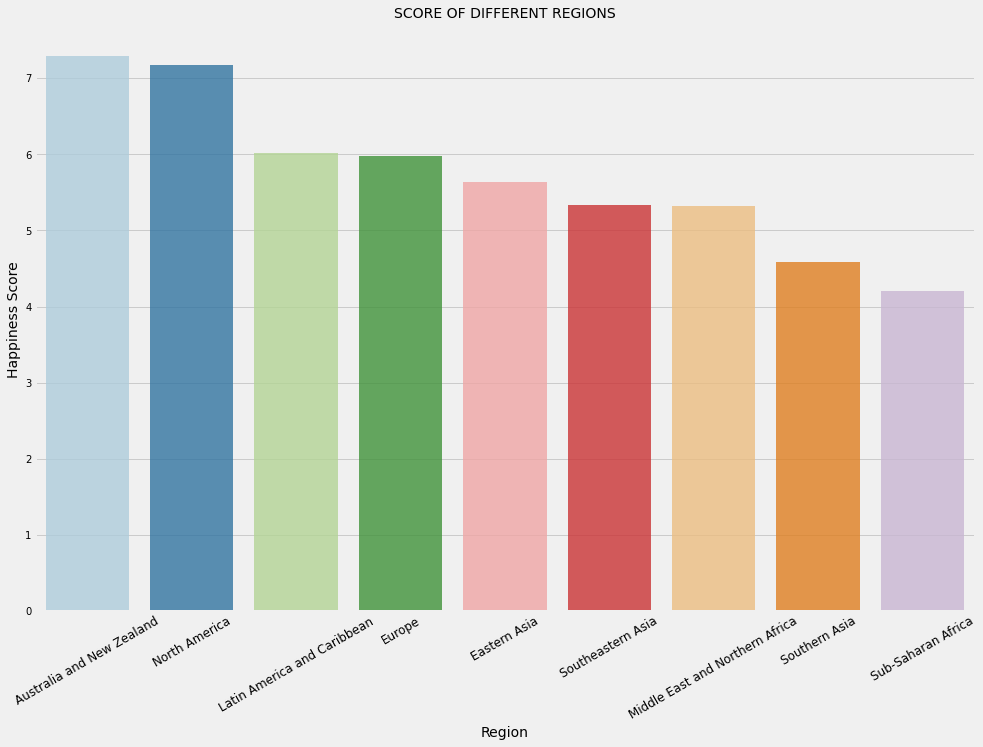

In [1065]:
# SCORE OF DIFFERENT REGIONS 
#SHOWING AS A BARCHART
plt.figure(figsize=(15, 10))
sns.barplot(x=mean_by_region['Region'], y=mean_by_region['Happiness Score'], alpha=0.8 , palette='Paired')
plt.title('SCORE OF DIFFERENT REGIONS', fontsize=14, pad=10)
plt.ylabel('Happiness Score', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=10)
plt.show()


[Nach Region können wir einfach sehen:](uf0)
- In der Region "Australien und Neuseeland" sind die Leute am glücklichsten
- Die Leute, die in der Region"Afrika südlich der Sahara" wohnen, fühlen sich am unglücklichsten 
- Die Glücksrate von "Europa" ist die Niedrigste

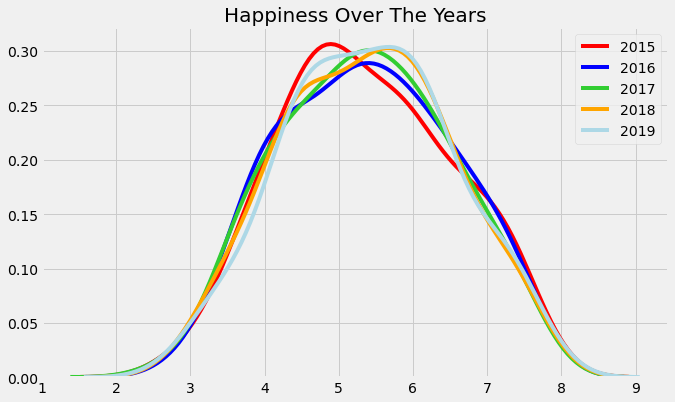

In [1066]:
# HAPPINESS OVER THE YEARS 2015-2019 
sns.kdeplot(df_15['Happiness Score'],color='red', label='2015')
sns.kdeplot(df_16['Happiness Score'],color='blue', label='2016')
sns.kdeplot(df_17['Happiness Score'],color='limegreen', label='2017')
sns.kdeplot(df_18['Happiness Score'],color='orange', label='2018')
sns.kdeplot(df_19['Happiness Score'],color='lightblue', label='2019')
plt.title('Happiness Over The Years',size=20)
plt.legend()
plt.show()

[Fazit](uf0)
- Die Kurve sind ähnlich miteinander

In [1067]:
# TOP 5 HAPPINESS COUNTRIES ALL OVER THE WORLD IN YEAR 2015
df5_15 = df_15.sort_values(by= 'Happiness Score', ascending= False)
df5_15.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [1068]:
# TOP 5 HAPPINESS COUNTRIES  ALL OVER THE WORLD IN YEAR 2019
df5_19 = df_19.sort_values(by= 'Happiness Score', ascending= False)
df5_19.head(5)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region
0,1.0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019.0,Western Europe
1,2.0,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019.0,Western Europe
2,3.0,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019.0,Western Europe
3,4.0,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019.0,Western Europe
4,5.0,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019.0,Western Europe


[Fazit:](uf0) Die Top 5 der glücklichsten Länder der Welt von 2015 bis 2019 ändern sich:
- Vom 1. Platz 2015 rutschte die Schweiz aus der Rangliste 2019 heraus.
- Finnland hat einen spektakulären Pass auf die Spitzenposition im Jahr 2019
- Kanada ist das einzige außereuropäische Land, das es 2015 in die Top 5 geschafft hat, dann aber auch verschwunden ist

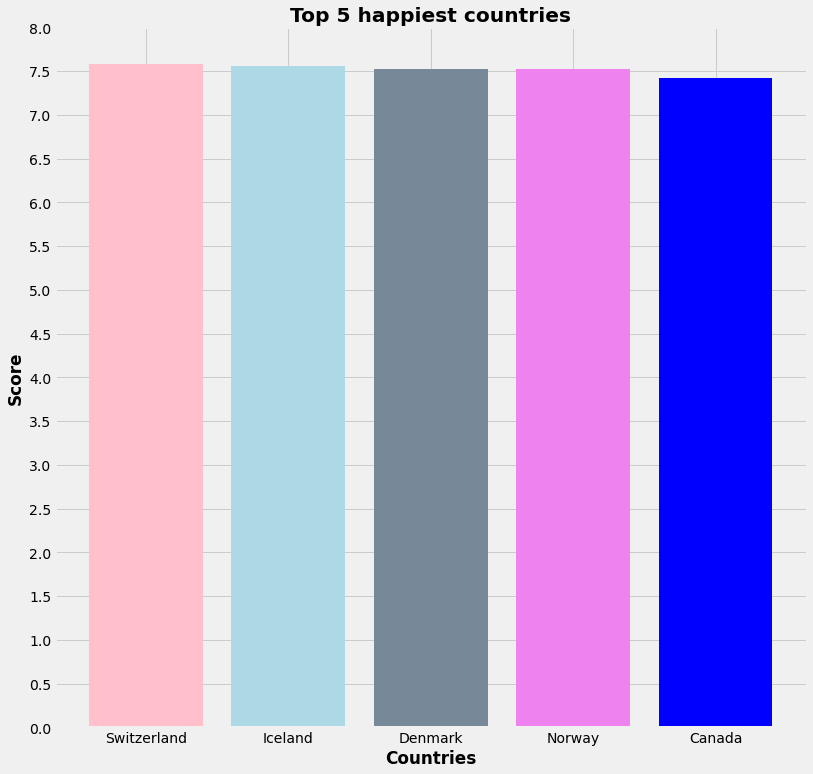

In [1069]:
#PLOT BAR CHART
a = finaldf['Country'].iloc[:5] 
b = finaldf['Happiness Score'].iloc[:5]

ticks = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8]

plt.figure(figsize=[12, 12])
plt.bar(a, b, color=['pink', 'lightblue', 'lightslategray', 'violet', 'blue', 'springgreen', 'deepskyblue', 'orange', 'darkgreen' , 'purple'])

plt.title('Top 5 happiest countries', weight='bold')
plt.xlabel ('Countries', weight='bold')
plt.ylabel('Score', weight='bold')
plt.yticks(ticks)
plt.show()

[Fazit:](uf0)
- Die Glücksraten dieser Top-5-Länder haben keinen großen Unterschied.

In [1070]:
# NOW DATA ONLY IN EUROPE
finaldf1 = finaldf.copy()
dfregion = finaldf1[ finaldf1['Region'] != 'Europe' ].index
finaldf1.drop(dfregion , inplace=True)
finaldf1

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Europe
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Europe
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Europe
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Europe
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015,Europe
...,...,...,...,...,...,...,...,...,...,...,...
735,Bulgaria,97,5.011,1.09200,1.51300,0.81500,0.31100,0.00400,0.08100,2019,Europe
745,Albania,107,4.719,0.94700,0.84800,0.87400,0.38300,0.02700,0.17800,2019,Europe
754,Armenia,116,4.559,0.85000,1.05500,0.81500,0.28300,0.06400,0.09500,2019,Europe
757,Georgia,119,4.519,0.88600,0.66600,0.75200,0.34600,0.16400,0.04300,2019,Europe


In [1071]:
# CHECK BASIC STATISTICAL DATA BY FEATURE
finaldf1.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,5.983672,1.166340,1.241300,0.777746,0.420916,0.137610,0.204837
std,0.929614,0.254592,0.272810,0.133537,0.157800,0.129051,0.121120
min,4.096000,0.390470,0.192490,0.437726,0.058220,0.000000,0.000000
25%,5.282500,1.023945,1.069708,0.677070,0.293535,0.032481,0.115044
50%,5.838000,1.217684,1.279000,0.792566,0.434080,0.073843,0.188000
75%,6.857500,1.338615,1.475836,0.875595,0.559500,0.233000,0.279490
max,7.769000,1.741944,1.644000,1.062000,0.724000,0.483570,0.574731


[Fazit:](ufd_0)

- Datensatz hat jetzt nur noch 247 Titeln.
- Minimum von Glücksrate ist 4,096 ( doppelt zu größ als der Mindestwert der ganzen Welt) und Maximum ist 7.769.
- Die Mittelswerte von Glücksrate ist 5.9 (auch größer als der Wert der ganzen Welt).

In [1072]:
# NO MISSING VALUES
#finaldf1.isnull().any()

In [1073]:
# NO DUPLICATED ROWS
#finaldf1.duplicated().sum()

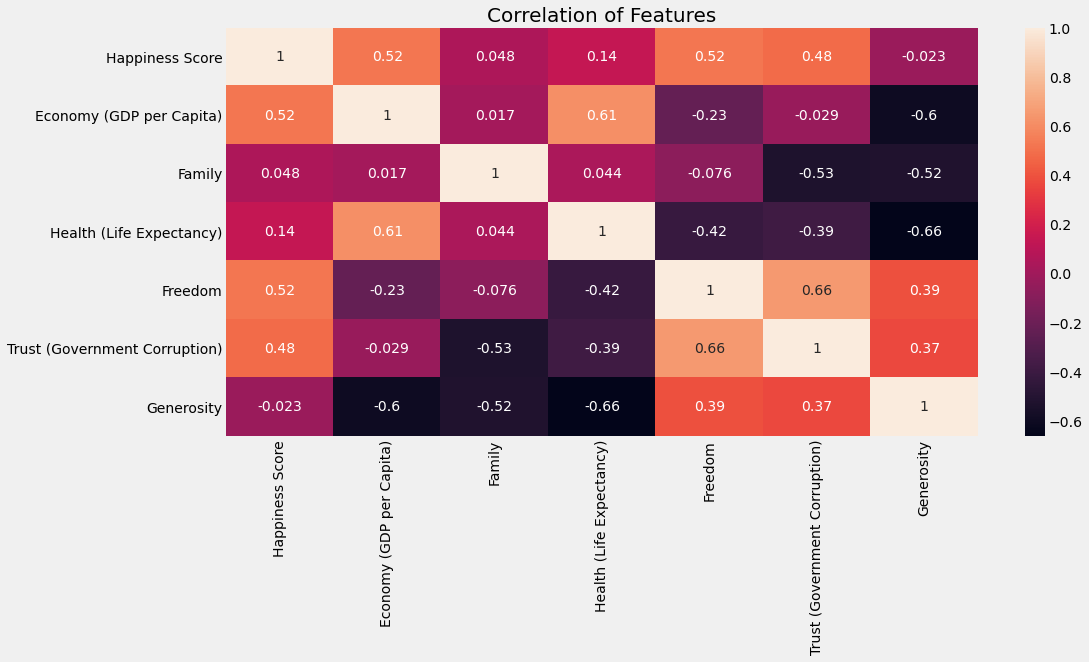

In [1074]:
# USE HEATMAP TO VISUALIZE THE CORRELATION BETWEEN THE FEATURES
plt.figure(figsize=(15,12))
plt.title('Correlation of Features', fontsize=20)
sns.heatmap(finaldf1.corr().astype(float).corr(),vmax=1.0, annot=True)
plt.gcf().set_size_inches(15, 7)
plt.show()

[Faktoren, die den Glücksfaktor beeinflussen:](uf0)

- Es scheint, dass 'Economy', 'Family' und 'Freedom', 'Curruption' stark mit 'Happiness Score' (starke positive Korrelation) korreliert sind.
- Es ist überrascht, dass 'Health' eine Positive hat, aber eine mittelmäßige Korrelation mit 'Happiness Score'
- 'Generosity' hat keine Beziehung zu 'Happiness Score'.

- 'Happiness Score' steht in engem Zusammenhang mit 'Economy', 'Family' und 'Freedom', 'Curruption'.
- 'Happines Score' steht in KEINEM Zusammenhang mit 'Generosity'.

-->Europa hat ein hohes BIP, gute soziale Unterstützung, hohe Staatsbürgerschaft (Freiheit), Vertrauen in die Regierung -> auch der Zufriedenheitswert ist hoch.
Das Gesundheitssystem ist jedoch gut, Gesundheit wird geschätzt, aber sie ist kein wichtiger Faktor, um das Glücksniveau in Europa zu bewerten. 

In [1075]:
def subset(data, country_name):
    subset = data.loc[data['Country'] == country_name]
    return subset

In [1076]:
subset(finaldf1,'Norway')

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region
3,Norway,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2015,Europe
161,Norway,4,7.498,1.577440,1.126900,0.795790,0.596090,0.357760,0.378950,2016,Europe
315,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2017,Europe
478,Norway,2,7.594,1.456000,1.582000,0.861000,0.686000,0.340000,0.286000,2018,Europe
641,Norway,3,7.554,1.488000,1.582000,1.028000,0.603000,0.341000,0.271000,2019,Europe


[Aber es gibt jedoch Ausnahmen auf der Welt, die sind:](uf0)

In [1077]:
subset(finaldf,'Qatar')

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region
27,Qatar,28,6.611,1.690420,1.078600,0.797330,0.640400,0.522080,0.325730,2015,Middle East and Northern Africa
193,Qatar,36,6.375,1.824270,0.879640,0.717230,0.566790,0.480490,0.323880,2016,Middle East and Northern Africa
349,Qatar,35,6.375,1.870766,1.274297,0.710098,0.604131,0.439299,0.330474,2017,Middle East and Northern Africa
508,Qatar,32,6.374,1.649000,1.303000,0.748000,0.654000,0.171000,0.256000,2018,Middle East and Northern Africa
667,Qatar,29,6.374,1.684000,1.313000,0.871000,0.555000,0.167000,0.220000,2019,Middle East and Northern Africa


[Fazit:](uf0)

- Das obige Diagramm zeigt, dass ein Land mit einem höheren Pro-Kopf-BIP im Allgemeinen ein glücklicherer Ort ist, obwohl es Ausnahmen gibt. Aus den früheren Berechnungen geht hervor, dass Katar das maximale Pro-Kopf-BIP hatte, aber nicht annähernd das glücklichste Land ist. Dies kann beweisen, dass eine starke Wirtschaft nicht die Antwort auf Glück ist.

<Figure size 2160x2160 with 0 Axes>

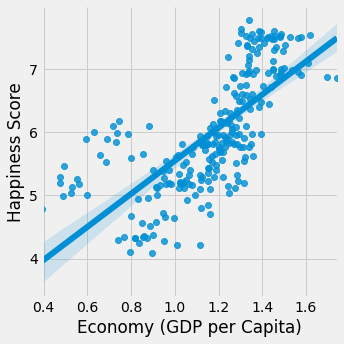

<Figure size 2160x2160 with 0 Axes>

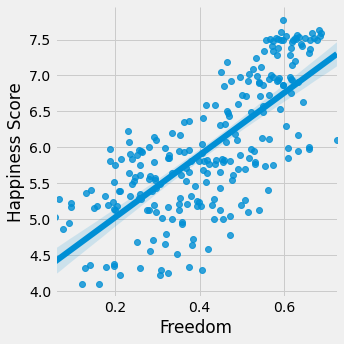

<Figure size 2160x2160 with 0 Axes>

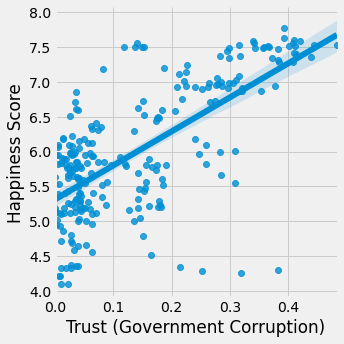

<Figure size 2160x2160 with 0 Axes>

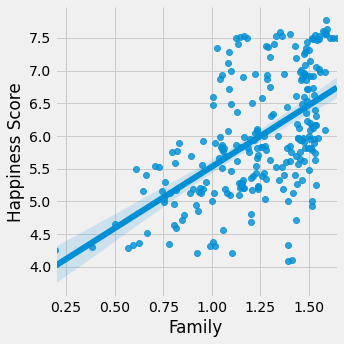

<Figure size 2160x2160 with 0 Axes>

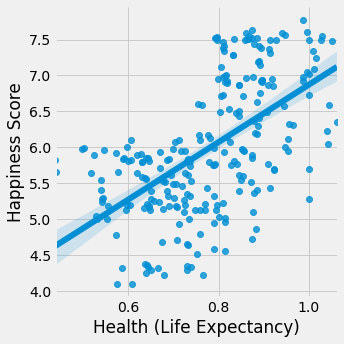

<Figure size 2160x2160 with 0 Axes>

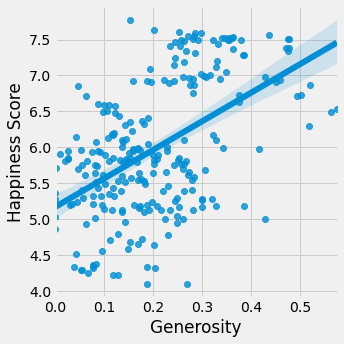

In [1078]:
# PLOT
# REALTIONSHIP BETWEEN HAPPINESS SCORE AND GDP PER CAPITA
# REALTIONSHIP BETWEEN HAPPINESS SCORE AND FREEDOM
# HOW DOES CURRUPTION AFFECT A COUNTRY'S HAPPINESS?
# RELATION AMONG FAMILY, , GENEROSITY, Health (Life Expectancy) AND HAPPINESS SCORE

for i in ['Economy (GDP per Capita)',
 'Freedom', 'Trust (Government Corruption)','Family',
 'Health (Life Expectancy)',
 'Generosity'] :
    plt.figure(figsize=(30,30))
    sns.lmplot(x=i,y='Happiness Score',data=finaldf1)

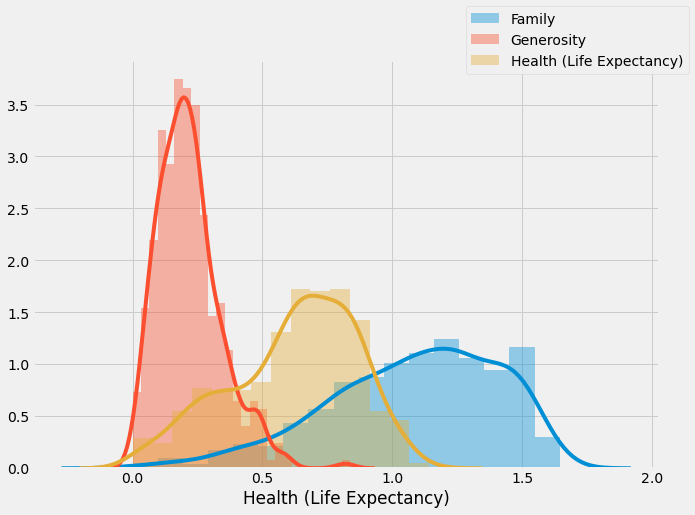

In [1079]:
# OVERVIEW FAMILY, GENEROSITY AND Health (Life Expectancy)	 
fig = plt.figure(figsize=(10,7))
sns.distplot(finaldf['Family'])
sns.distplot(finaldf['Generosity'])
sns.distplot(finaldf['Health (Life Expectancy)'])
fig.legend(labels=['Family','Generosity','Health (Life Expectancy)'])

### Fazit:
Es gibt nicht zu viel Korrelation, Multikollinearitätsproblem scheint nicht zu existieren.
- Großzügigkeit hat keinen Zusammenhang mit dem Glücksrate.

In [1080]:
subset(finaldf1,'Spain')

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region
35,Spain,36,6.329,1.230110,1.313790,0.955620,0.459510,0.063980,0.182270,2015,Europe
194,Spain,37,6.361,1.342530,1.129450,0.878960,0.375450,0.061370,0.176650,2016,Europe
348,Spain,34,6.403,1.384398,1.532091,0.888961,0.408781,0.070914,0.190134,2017,Europe
512,Spain,36,6.310,1.251000,1.538000,0.965000,0.449000,0.074000,0.142000,2018,Europe
668,Spain,30,6.354,1.286000,1.484000,1.062000,0.362000,0.079000,0.153000,2019,Europe


In [1081]:
subset(finaldf,'Myanmar')

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Region
128,Myanmar,129,4.307,0.271080,0.709050,0.482460,0.440170,0.190340,0.795880,2015,Southeastern Asia
276,Myanmar,119,4.395,0.341120,0.699810,0.398800,0.426920,0.202430,0.819710,2016,Southeastern Asia
428,Myanmar,114,4.545,0.367111,1.123236,0.397523,0.514492,0.188816,0.838075,2017,Southeastern Asia
606,Myanmar,130,4.308,0.682000,1.174000,0.429000,0.580000,0.178000,0.598000,2018,Southeastern Asia
769,Myanmar,131,4.360,0.710000,1.181000,0.555000,0.525000,0.172000,0.566000,2019,Southeastern Asia


[Fazit:](uf0)

- Syrien und Myanmar sind zum Beispiel großzügige Länder, aber die Menschen sind nicht glücklich

# III. Data Transformierung und Bereinigung

## 1. Überprüfung der Ausreißer und Behandlung

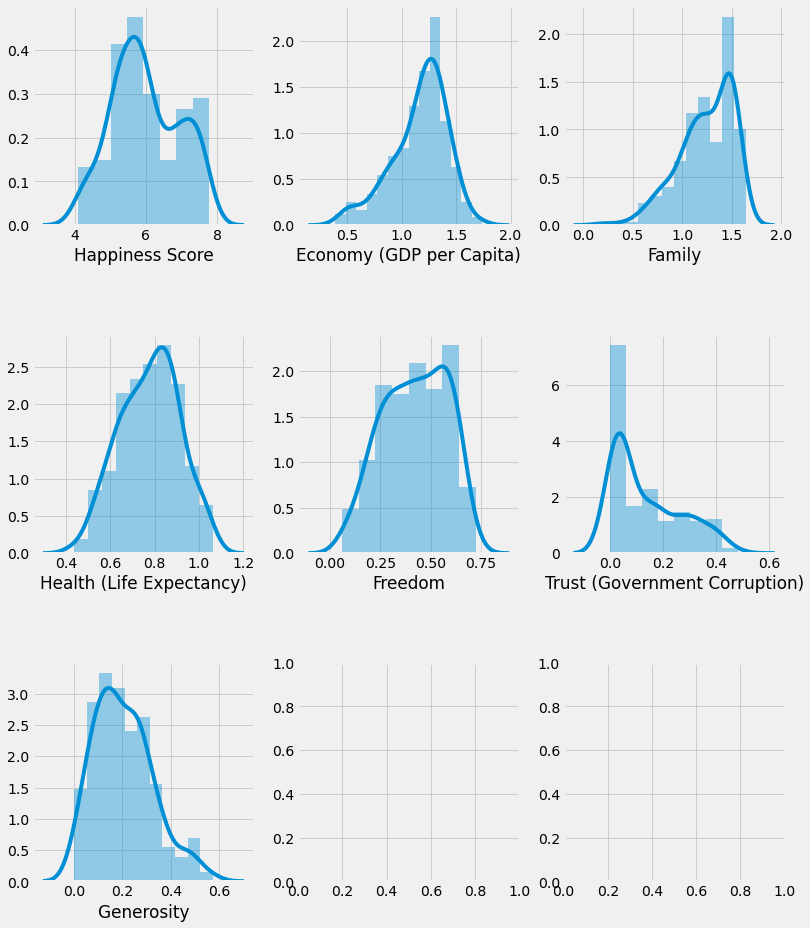

In [1082]:
#Plot histogram of numerical features in your dataset
fig,axes = plt.subplots(3,3,figsize=(12,15))
for index,col in enumerate(num_col):
    x,y = index//3,index%3
    sns.distplot(finaldf1[col],ax=axes[x,y])

plt.subplots_adjust(hspace=0.5)

[Fazit:](uf0)
- Es gibt Ausreißer in 'Family', 'Corruption' and 'Generosity'

In [1083]:
import scipy.stats

def handle_outlier(finaldf1,column):
    # first quantile/percentile
    first_qrt = np.quantile(finaldf1[column],0.25)
    # third quantile/percentile
    third_qrt = np.quantile(finaldf1[column],0.75)

    lower_whisker = first_qrt - (third_qrt -first_qrt )*1.5
    upper_whisker = third_qrt + (third_qrt -first_qrt )*1.5
  
    df_lower = finaldf1.loc[(finaldf1[column] < lower_whisker)] 
    df_upper = finaldf1.loc[(finaldf1[column] > upper_whisker)]
    
    finaldf1[column]= scipy.stats.mstats.winsorize(finaldf1[column],limits = [len(df_lower)/len(finaldf1),len(df_upper)/len(finaldf1)])

In [1084]:

for col in ['Happiness Score',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity']:
    handle_outlier(finaldf1,col)

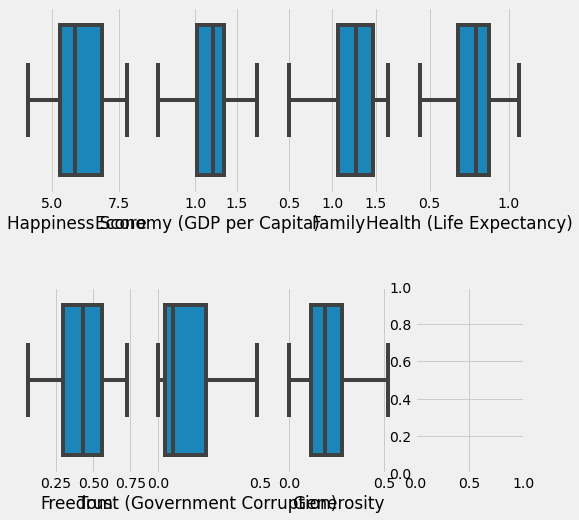

In [1085]:
fig,axes = plt.subplots(2,4,figsize=(8,8))
for index,col in enumerate(num_col):
    x,y = index//4,index%4
    sns.boxplot(finaldf1[col],ax=axes[x,y])

plt.subplots_adjust(hspace=0.5)

## 2. Auswahl der Merkmale

In [1086]:
# MULTICOLLINEARITY
corrMatrix = finaldf1.corr()
corrMatrix

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.000000,0.723763,0.551245,0.574611,0.737165,0.678627,0.522181
Economy (GDP per Capita),0.723763,1.000000,0.389241,0.613656,0.442834,0.466836,0.212925
Family,0.551245,0.389241,1.000000,0.367217,0.471336,0.223993,0.179463
Health (Life Expectancy),0.574611,0.613656,0.367217,1.000000,0.373889,0.291676,0.174692
Freedom,0.737165,0.442834,0.471336,0.373889,1.000000,0.680681,0.538316
Trust (Government Corruption),0.678627,0.466836,0.223993,0.291676,0.680681,1.000000,0.480046
Generosity,0.522181,0.212925,0.179463,0.174692,0.538316,0.480046,1.000000


## 3. Kodierung kategorialer Variables

In [1087]:
#ENCODING CATEGORICAL VARIABLES IN ORDER TO PREPARE THEM FOR MODELLING
le = preprocessing.LabelEncoder()
finaldf1['Country'] = le.fit_transform(finaldf1['Country'])
#finaldf1.head()

## 4. Identifizierung der P-values 

In [1088]:
target = finaldf1['Happiness Score'].values 
variables = finaldf1.drop(columns = {'Happiness Score','Happiness Rank', 'Year', 'Region', 'Generosity'}).values 
#target

In [1089]:
import statsmodels.api as sm
mod = sm.OLS(target,variables)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

x1    2.481120e-04
x2    1.845119e-16
x3    7.484854e-10
x4    4.810941e-15
x5    1.262097e-06
x6    6.544111e-04
Name: P>|t|, dtype: float64

In [1090]:
mod = sm.OLS(target,variables)
fii = mod.fit()
fii.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
x1,0.008683,0.002334,3.719779,2.481120e-04,0.004085,0.013282
x2,1.605242,0.181260,8.856022,1.845119e-16,1.248186,1.962298
x3,0.945270,0.147408,6.412631,7.484854e-10,0.654898,1.235641
x4,2.352468,0.281155,8.367146,4.810941e-15,1.798632,2.906303
x5,1.606017,0.323048,4.971453,1.262097e-06,0.969659,2.242375
x6,1.258498,0.364452,3.453127,6.544111e-04,0.540581,1.976416


# IV. Modellierunng - Hypothese Happiness Score in Europa

## 1. Linear Regressionsmodell

In [1091]:
finaldf2 = finaldf1.copy()

In [1092]:
finaldf2 = finaldf2.rename(columns = {'Happiness Score':'Happiness_Score'})
finaldf2.drop(['Happiness Rank','Region', 'Year', 'Generosity'], axis=1, inplace=True)

In [1093]:
#finaldf2

In [1094]:
y = finaldf2.Happiness_Score.to_numpy() 
X = finaldf2.drop(columns = 'Happiness_Score').to_numpy() #Zilvariable, --> der Rest ist erklärende Variable

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1095]:
# DEFINE THE PREDICTOR
# DEFINE THE TARGET

In [1096]:
# USING RANDOM SELECTION TO SPLIT INTO 2 SUBSETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 30)

In [1097]:
# CREATE LINEAR REGRESSION OBJECT
lr = LinearRegression()
# TRAIN THE MODEL USING THE TRAINING SET
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.800698644119312

In [1098]:
# OUR MODEL IS GOOD?
print('linear model coeff (w): {}'
     .format(lr.coef_))
print('linear model intercept (b): {:.3f}'
     .format(lr.intercept_))
print('R-squared score (training): {:.3f}'
     .format(lr.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(lr.score(X_test, y_test)))

linear model coeff (w): [0.00378826 1.18319887 0.69075879 0.79773172 1.45319697 1.98154907]
linear model intercept (b): 2.140
R-squared score (training): 0.801
R-squared score (test): 0.781


[Fazit](uf0)

- Der Abstand des R-Quadrat-Scores (zwischen Training und Test) ist klein, nur 0,02. -->Unser Modell läuft gut.

In [1099]:
# TEST THE MODEL WITH TESTING SET
# MAKE PREDICTION USING TESTING SET
y_pred = lr.predict(X_test)

In [1100]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()}).head(25)
pred.head(10)

,Actual,Predicted
0,5.893,6.440249
1,6.100,5.449023
2,5.192,5.163125
3,5.033,5.008301
4,5.569,5.769556
5,5.940,5.809460
6,6.907,6.797638
7,7.769,7.302500
8,6.985,6.861426
9,7.119,6.468042


In [1120]:
# MSE-Linear
mse1=mean_squared_error(y_pred,y_test)
mse1

0.20115317542295932

In [1102]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.781266594002052

Text(0.5, 1.0, 'Happiness Score')

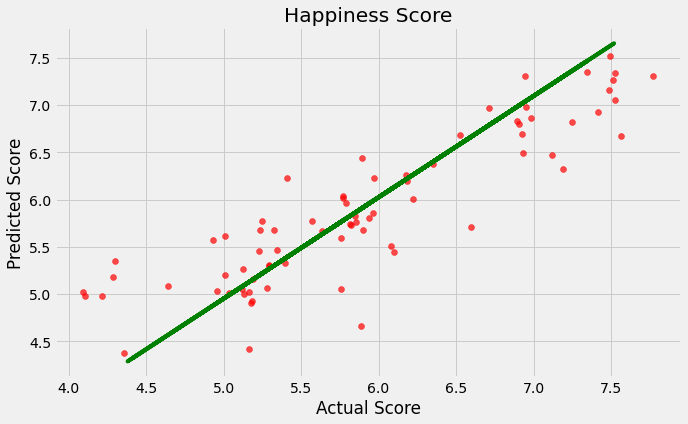

In [1103]:
# PLOT PREDICTION
plt.style.use(style = 'fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
plt.scatter(y_test, y_pred, alpha = 0.7, color = 'r')
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred, (m * y_pred + b), color = 'g')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Happiness Score')

In [1104]:
# SAVE MODEL
import pickle
path = './'
filename = 'lr.p'
pickle.dump(lr, open(path + filename, 'wb')) 
# LOAD MODEL
linear_model = pickle.load(open(path + filename, 'rb')) 

## 2. Ridge Regressionsmodell

In [1105]:
ridge = Ridge()
ridge.fit(X_train,y_train)
p=ridge.predict(X_test)
mse=mean_squared_error(p,y_test)
rmse=np.sqrt(mean_squared_error(p,y_test))
r2=r2_score(y_test,p)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)

Mean absolute error 0.3449781221657261
Mean squared error 0.21217149974004926
Root Mean squared error 0.46062077649629446


In [1106]:
print('ridge model coeff (w): {}'
     .format(ridge.coef_))
print('ridge model intercept (b): {:.3f}'
     .format(ridge.intercept_))
print('R-squared score (training): {:.3f}'
     .format(ridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(ridge.score(X_test, y_test)))

ridge model coeff (w): [0.00421743 1.24696427 0.71302329 0.64755504 1.38334502 1.48251325]
ridge model intercept (b): 2.245
R-squared score (training): 0.795
R-squared score (test): 0.769


# 3. Neuronale Netze

In [1107]:
import tensorflow.keras.layers.experimental
import tensorflow as tf
# Create the Percepton
model = Sequential()

In [1108]:
finaldf3 = finaldf1.copy()
finaldf3.columns

Index(['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year',
       'Region'],
      dtype='object')

In [1110]:
#taking input data
X1_train = finaldf3[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)']] 
X1_train

y1_train = finaldf3['Happiness Score']
y1_train


0      7.587
1      7.561
2      7.527
3      7.522
5      7.406
       ...  
735    5.011
745    4.719
754    4.559
757    4.519
771    4.332
Name: Happiness Score, Length: 247, dtype: float64

In [1111]:
X1_train.shape

(247, 5)

In [1112]:
y1_train.shape

(247,)

In [1113]:

def build_and_compile_model(norm):
    model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.0005))
    return model

happiness_normalizer = tensorflow.keras.layers.experimental\
                            .preprocessing.Normalization()
model = build_and_compile_model(happiness_normalizer)
model.fit(X1_train, y1_train, epochs=150, batch_size=10)

Epoch 1/150
25/25 [==============================] - 1s 2ms/step - loss: 5.2641
Epoch 2/150
25/25 [==============================] - 0s 3ms/step - loss: 3.4639
Epoch 3/150
25/25 [==============================] - 0s 2ms/step - loss: 0.7989
Epoch 4/150
25/25 [==============================] - 0s 2ms/step - loss: 0.4245
Epoch 5/150
25/25 [==============================] - 0s 3ms/step - loss: 0.3949
Epoch 6/150
25/25 [==============================] - 0s 2ms/step - loss: 0.3812
Epoch 7/150
25/25 [==============================] - 0s 2ms/step - loss: 0.3727
Epoch 8/150
25/25 [==============================] - 0s 2ms/step - loss: 0.3719
Epoch 9/150
25/25 [==============================] - 0s 3ms/step - loss: 0.3706
Epoch 10/150
25/25 [==============================] - 0s 3ms/step - loss: 0.3710
Epoch 11/150
25/25 [==============================] - 0s 2ms/step - loss: 0.3519
Epoch 12/150
25/25 [==============================] - 0s 2ms/step - loss: 0.3481
Epoch 13/150
25/25 [=================

In [1114]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_22 (Normalizat (None, 5)                 11        
_________________________________________________________________
dense_88 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_89 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_90 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 33        
Total params: 6,668
Trainable params: 6,657
Non-trainable params: 11
_________________________________________________________________


In [1115]:
#making a prediction
y_pre = model.predict(X1_train)

In [1116]:
y_pre[:5]

array([[7.235901 ],
       [6.4520307],
       [7.161289 ],
       [7.1471496],
       [6.9688897]], dtype=float32)

In [1117]:
y1_train[:5]

0    7.587
1    7.561
2    7.527
3    7.522
5    7.406
Name: Happiness Score, dtype: float64

In [1118]:
#finaldf3.describe()

In [1119]:
#comparing the predictions to the desired output
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pre, y1_train))

0.20670749413244816
